In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score


## Supress warnings
import warnings
warnings.filterwarnings ( "ignore" )

In [25]:
data = pd.read_csv('Iris.csv')

In [28]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
data.drop('Id', axis=1, inplace=True)

<Figure size 1000x500 with 0 Axes>

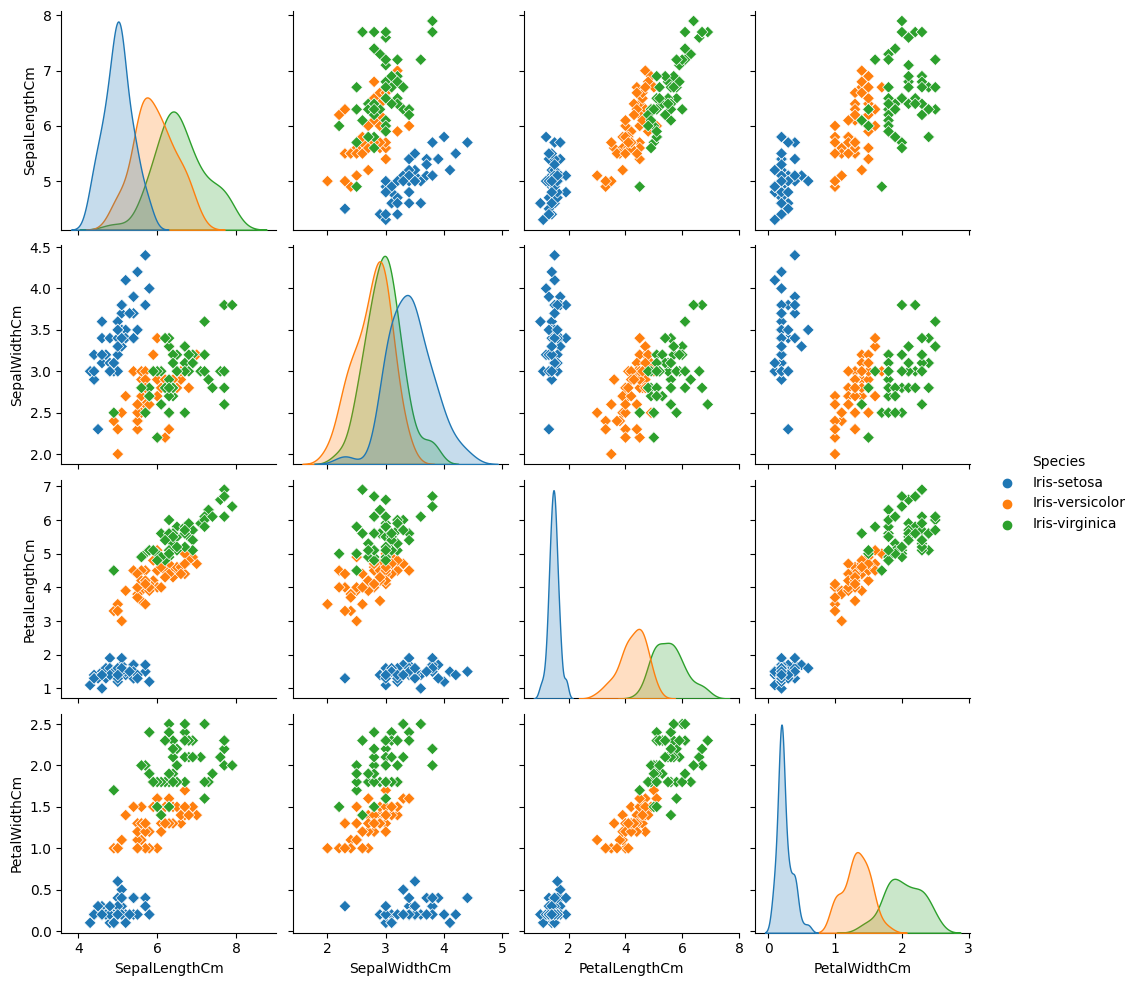

In [12]:
plt.figure(figsize=(10,5))
sns.pairplot(data, hue='Species',markers='D')
plt.show()

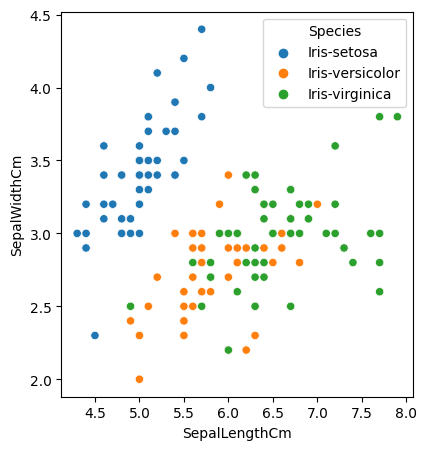

In [13]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=data,hue='Species')
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['EncodedSpecies'] = le.fit_transform(data['Species'])
data.drop('Species', axis=1, inplace=True)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,EncodedSpecies
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
X = data.iloc[:,0:4]
y = data.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: EncodedSpecies, Length: 150, dtype: int32

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [17]:
y_pred_decoded = le.inverse_transform(y_pred)

y_pred_df = pd.DataFrame({'Predicted_Letter': y_pred_decoded})

print("Predicted DataFrame:")
print(y_pred_df)

Predicted DataFrame:
   Predicted_Letter
0   Iris-versicolor
1       Iris-setosa
2    Iris-virginica
3   Iris-versicolor
4   Iris-versicolor
5       Iris-setosa
6   Iris-versicolor
7    Iris-virginica
8   Iris-versicolor
9   Iris-versicolor
10   Iris-virginica
11      Iris-setosa
12      Iris-setosa
13      Iris-setosa
14      Iris-setosa
15  Iris-versicolor
16   Iris-virginica
17  Iris-versicolor
18  Iris-versicolor
19   Iris-virginica
20      Iris-setosa
21   Iris-virginica
22      Iris-setosa
23   Iris-virginica
24   Iris-virginica
25   Iris-virginica
26   Iris-virginica
27   Iris-virginica
28      Iris-setosa
29      Iris-setosa


In [18]:
modelscore = model.score(X_test, y_test)
print("Accuracy:", modelscore*100)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

print(classification_report(y_test, y_pred))

Accuracy: 100.0
Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



{'whiskers': [<matplotlib.lines.Line2D at 0x14d62e0de90>,
 'caps': [<matplotlib.lines.Line2D at 0x14d659315d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14d65923990>],
 'medians': [<matplotlib.lines.Line2D at 0x14d65048a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x14d658741d0>],
 'means': []}

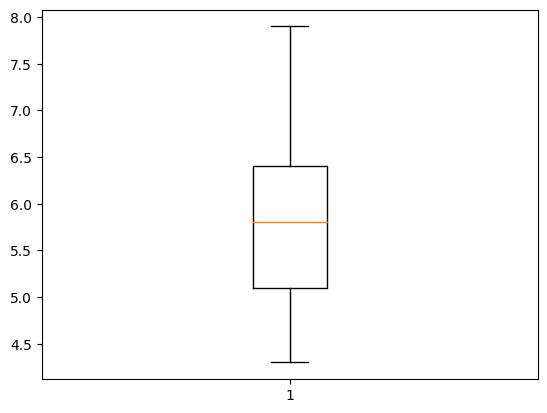

In [19]:
plt.boxplot(data['SepalLengthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x14d65992cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x14d65972850>,
 'boxes': [<matplotlib.lines.Line2D at 0x14d65992310>],
 'medians': [<matplotlib.lines.Line2D at 0x14d659a1090>],
 'fliers': [<matplotlib.lines.Line2D at 0x14d659a1790>],
 'means': []}

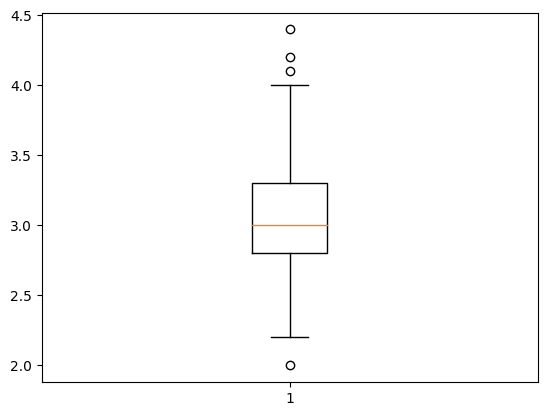

In [20]:
plt.boxplot(data['SepalWidthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x14d659f6650>,
 'caps': [<matplotlib.lines.Line2D at 0x14d659f7a50>,
 'boxes': [<matplotlib.lines.Line2D at 0x14d659f5c90>],
 'medians': [<matplotlib.lines.Line2D at 0x14d65a04b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x14d65a052d0>],
 'means': []}

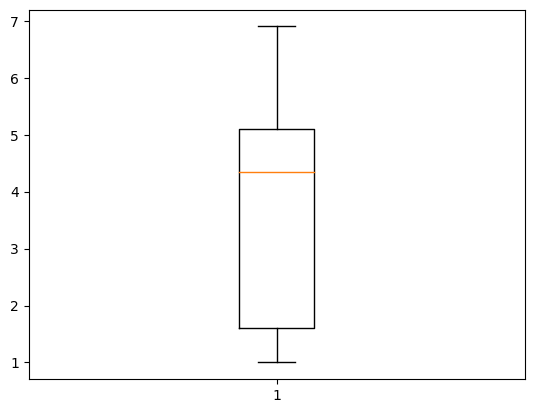

In [21]:

plt.boxplot(data['PetalLengthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x14d65bada10>,
 'caps': [<matplotlib.lines.Line2D at 0x14d65baf150>,
 'boxes': [<matplotlib.lines.Line2D at 0x14d65bacd50>],
 'medians': [<matplotlib.lines.Line2D at 0x14d65bb0850>],
 'fliers': [<matplotlib.lines.Line2D at 0x14d65bb1210>],
 'means': []}

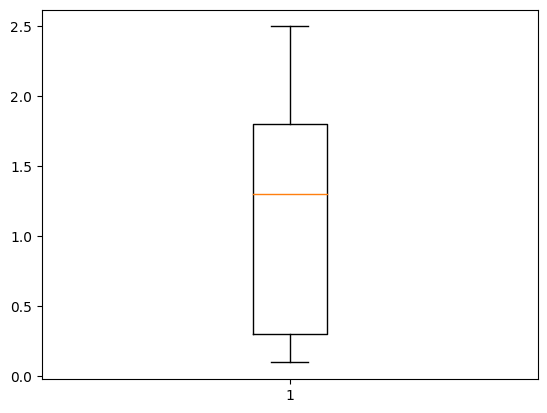

In [22]:
plt.boxplot(data['PetalWidthCm'])

<Axes: >

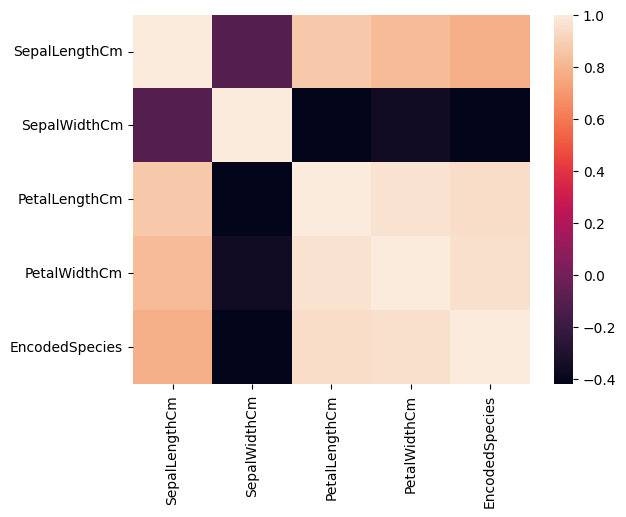

In [23]:
sns.heatmap(data.corr())

In [24]:
print("Mean squared error: %.2f" % np.mean((y_pred - y_test) ** 2))

Mean squared error: 0.00
